<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 9: Data Communication

### Submission Instructions

* Complete the following questions and upload your `.ipynb` file to Coursemology.
* Name the file in the following format: `Lab<num><YourName>.ipynb`
* DO NOT click "Restart and Run All" on your jupyter notebook for this lab, as that would result in error in the sample plots given.
* Finally, print a copy of your final solution to OneNote > Your Individual Student Notebook > Labs. Name the page `Lab <num>`.

We will be using the dataset on Canadian Immigration below:

In [654]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
#perform some data cleaning
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.iloc[:,4:].sum(axis=1)
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,95955
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2984


## Percentage Stack Area Chart

#### a) Create a percentage stack area chart for the data below.

In [655]:
sasia = df_can.loc[['Singapore','Thailand','Viet Nam','Malaysia']]
sasia = sasia[range(2010, 2014)].sort_values(2013, ascending=False, axis=0)
sasia

,2010,2011,2012,2013
Country,,,,
Viet Nam,1942,1723,1731,2112
Thailand,499,396,296,400
Malaysia,802,409,358,204
Singapore,805,219,146,141


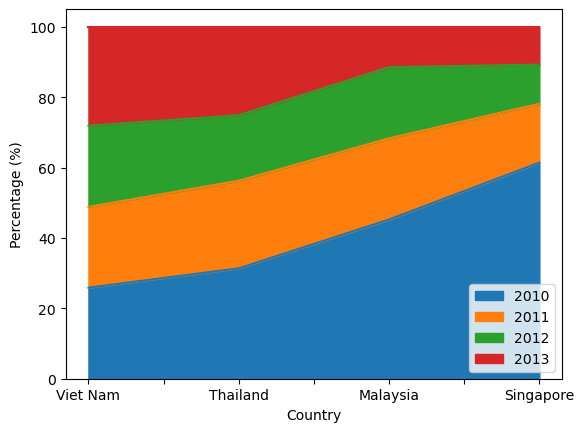

In [656]:
#your solution
sasia.apply(lambda x: x*100/sum(x), axis=1).plot(kind='area', stacked=True) 
plt.ylabel('Percentage (%)')
plt.show()

## Stacked Area Chart

#### b) Create a stacked area plot of the 5 countries that contributed the most to immigration to Canada from 1980 to 2013.

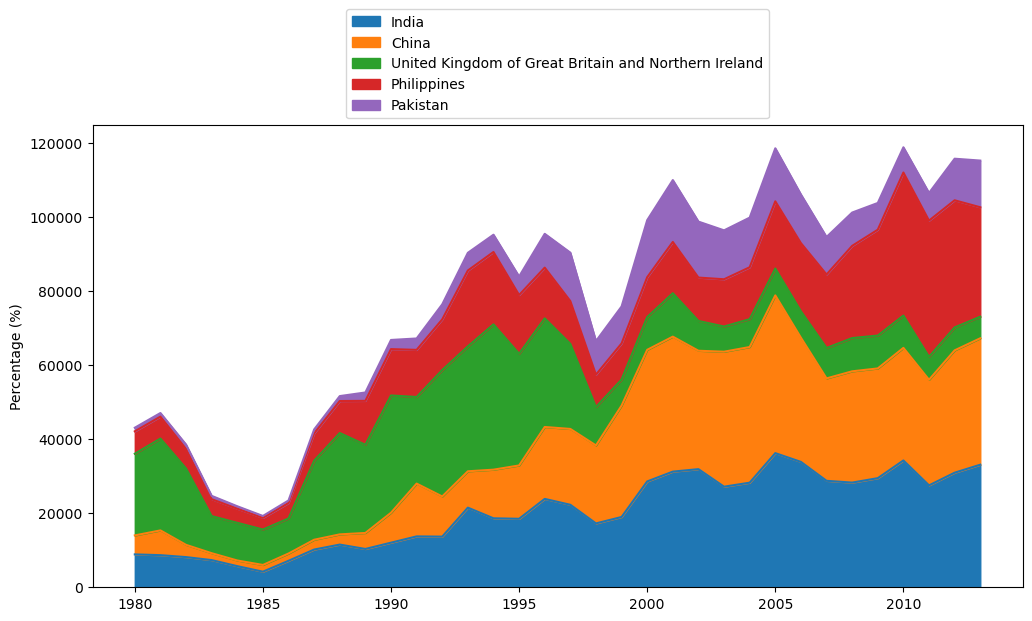

In [657]:
#your solution
df_cant = df_can.sort_values(by = 'Total', ascending = False).iloc[:5, 3:-1].T
df_cant.plot(kind='area', stacked=True, figsize = (12, 6)).legend(bbox_to_anchor=[0.5, 1], loc='lower center')
plt.ylabel('Percentage (%)')
plt.show()

## Labeling using `.text()`

#### c) Plot a line graph to visualize the number of immigrants from India, China and Philippines over the years. 

You should hide the legend. Instead, label the line using `.text()` function. 

Your final graph should look as follows:

Text(2005, 40000, 'China')

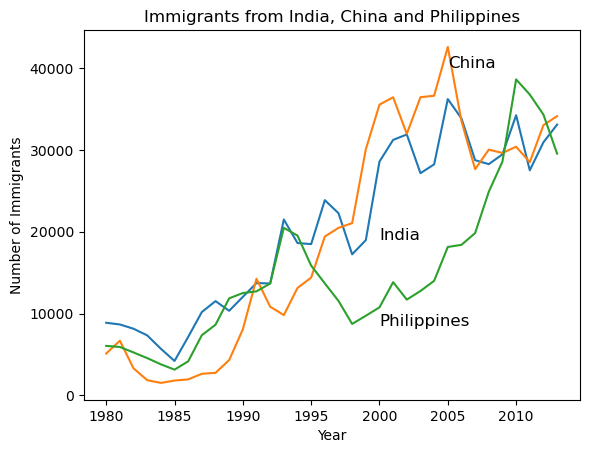

In [658]:
#your solution
fig = df_can.loc[('India', 'China', 'Philippines'), :].iloc[:, 3:-1].T.plot(kind='line', title='Immigrants from India, China and Philippines', legend = False, ylabel='Number of Immigrants', xlabel='Year')
fig.text(2000, 8500, 'Philippines', fontsize=12)
fig.text(2000, 19000, 'India', fontsize=12)
fig.text(2005, 40000, 'China', fontsize=12)

## Annotation

#### d) Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013. Plot a bar graph which shows the number of immigrants per year.

Your final graph should look as follows:

<Axes: title={'center': 'Icelandic immigrants to Canada from 1980 to 2013'}, xlabel='Year', ylabel='Number of Immigrants'>

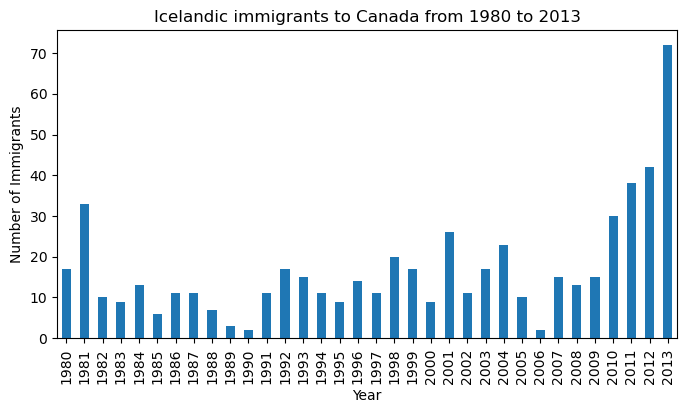

In [659]:
#your solution
df_cannot = df_can.loc['Iceland'].to_frame().iloc[3:-1]
df_cannot.plot(kind='bar', title='Icelandic immigrants to Canada from 1980 to 2013', legend = False, ylabel='Number of Immigrants', xlabel='Year', figsize = (8, 4))

Improve the visualization above by setting all bars to gray color, while highlighting the highest bar red.

Hint: Use a list of colors. Set it to gray for all, and red at the index of the highest bar.

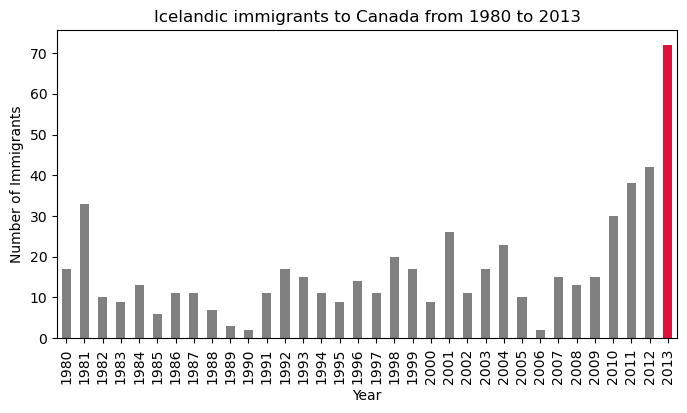

In [660]:
#your solution
colours = ['crimson' if u == df_cannot.loc[:, 'Iceland'].max() else 'gray' for u in df_cannot.loc[:, 'Iceland']]
bars = df_cannot.squeeze().plot(kind='bar', color = colours, title='Icelandic immigrants to Canada from 1980 to 2013', legend = False, ylabel='Number of Immigrants', xlabel='Year', figsize = (8, 4))
plt.show()

#### e) The bar plot in (d) shows the total number of immigrants broken down by each year. We hypothesize that the number of immigrants to Canada started increasing rapidly after 2008 due to the impact of the financial crisis and would like to illustrate that on the chart.

i) Let's annotate this on the plot using the `annotate` method. Draw an arrow using `annotate` to show the rapid increase after 2008.

You should make use of the following parameters:
- `s`: str, the text of annotation.
- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    - `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    - `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    - `color`: Specifes color of arror.
    - `lw`: Specifies the line width.

<div class="alert alert-block alert-danger">
Important Note: Please note that the xycoords is different from the one in (c) as this plot is a categorical bar plot (while chart in (c) is a quantitative line plot).
</div>

ii) Next, let's also annotate a text to go over the arrow.  Label the arrow with the text '2008 - 2011 Financial Crisis'.

You should make use of the following additional parameters:
- `rotation`: rotation angle of text in degrees (counter clockwise)
- `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]


You may read the Matplotlib documentation for more details on annotations: 
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

Your final graph should look as follows:

iii) To further highlight the changes in years 2008 to 2013, we can highlight these bars in a different color. Add relevent code to achieve this.

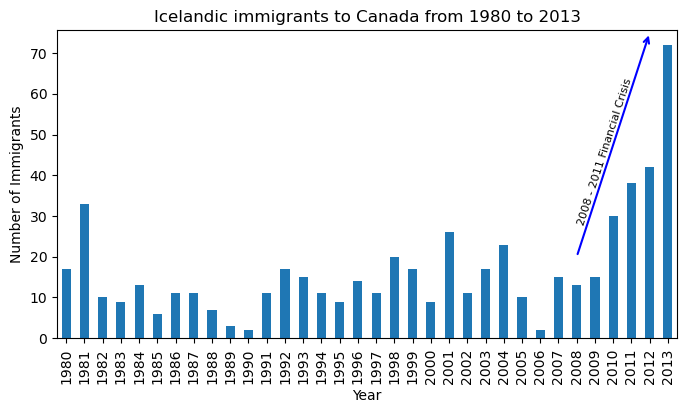

In [661]:
#your solution
bars = df_cannot.squeeze().plot(kind='bar', title='Icelandic immigrants to Canada from 1980 to 2013', legend = False, ylabel='Number of Immigrants', xlabel='Year', figsize = (8, 4))
bars.annotate('', 
             xy=(32, 75), #This is the point (x, y) where the arrow points to.
             xytext=(28, 20), #This is the starting point (x, y) of the arrow. 
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=1.5))
bars.text(28, 28, '2008 - 2011 Financial Crisis', fontsize=8, color='black',rotation=72)
plt.show()

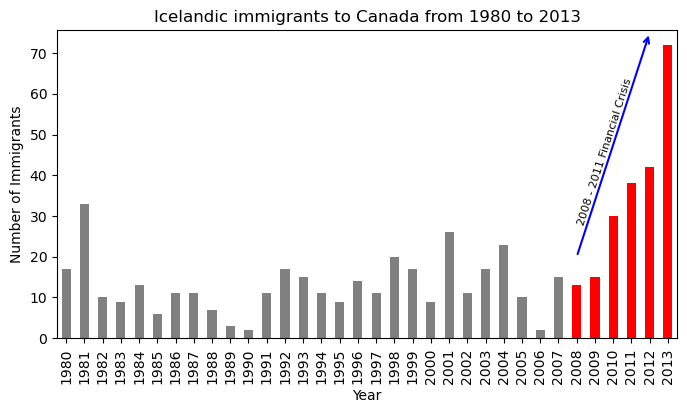

In [662]:
#your solution
bars = df_cannot.squeeze().plot(kind='bar', color = ['grey'] * 28 + ['red'] * 6, title='Icelandic immigrants to Canada from 1980 to 2013', legend = False, ylabel='Number of Immigrants', xlabel='Year', figsize = (8, 4))
bars.annotate('', 
             xy=(32, 75), #This is the point (x, y) where the arrow points to.
             xytext=(28, 20), #This is the starting point (x, y) of the arrow. 
             arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=1.5))
bars.text(28, 28, '2008 - 2011 Financial Crisis', fontsize=8, color='black',rotation=72)
plt.show()

## Small Multiples

#### f) We will experiment using subplots to create "small multiples" visualization. 

i) We wish to compare the number of immigrants from India with other top 9 Asian countries. Create a small multiple plot similar to the one shown below.

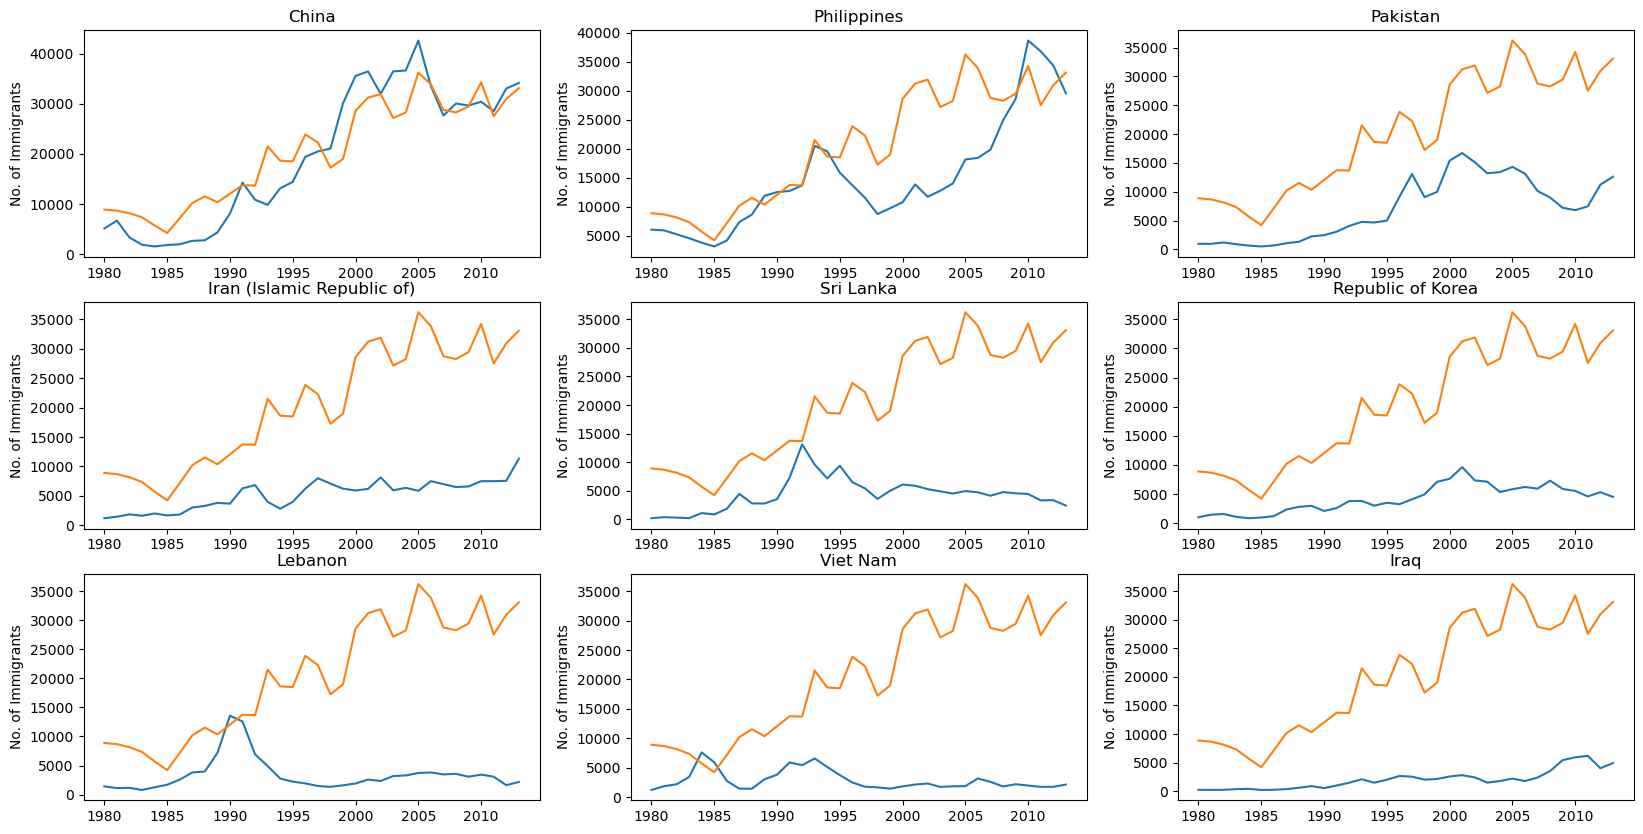

In [663]:
#your solution
temp = df_can.sort_values(by = 'Total', ascending = False)
df_list = [temp[(temp.Continent.str.contains('Asia')) & (~temp.index.str.contains('India'))].iloc[x, 3:-1] for x in range(9)]
fig, axes = plt.subplots(3, 3, figsize = (20, 10))

count=0
for r in range(3):
    for c in range(3):
        df_list[count].plot(ax=axes[r,c], ylabel = 'No. of Immigrants')
        temp[(temp.index.str.contains('India'))].iloc[:, 3:-1].T.plot(ax=axes[r,c], ylabel = 'No. of Immigrants', legend = False)
        axes[r,c].set_title(df_list[count].name)
        count += 1

ii) Notice that the y-axis is not consistent amongst the plots and it's unclear what each line refers to. Standardize the y-axis (maximum of 40000) and add SINGLE legend to denote what each colored line represent. The small multiples should also share a common y and x-axis (i.e. only the leftmost y axis and bottom most x-axis should be shown).

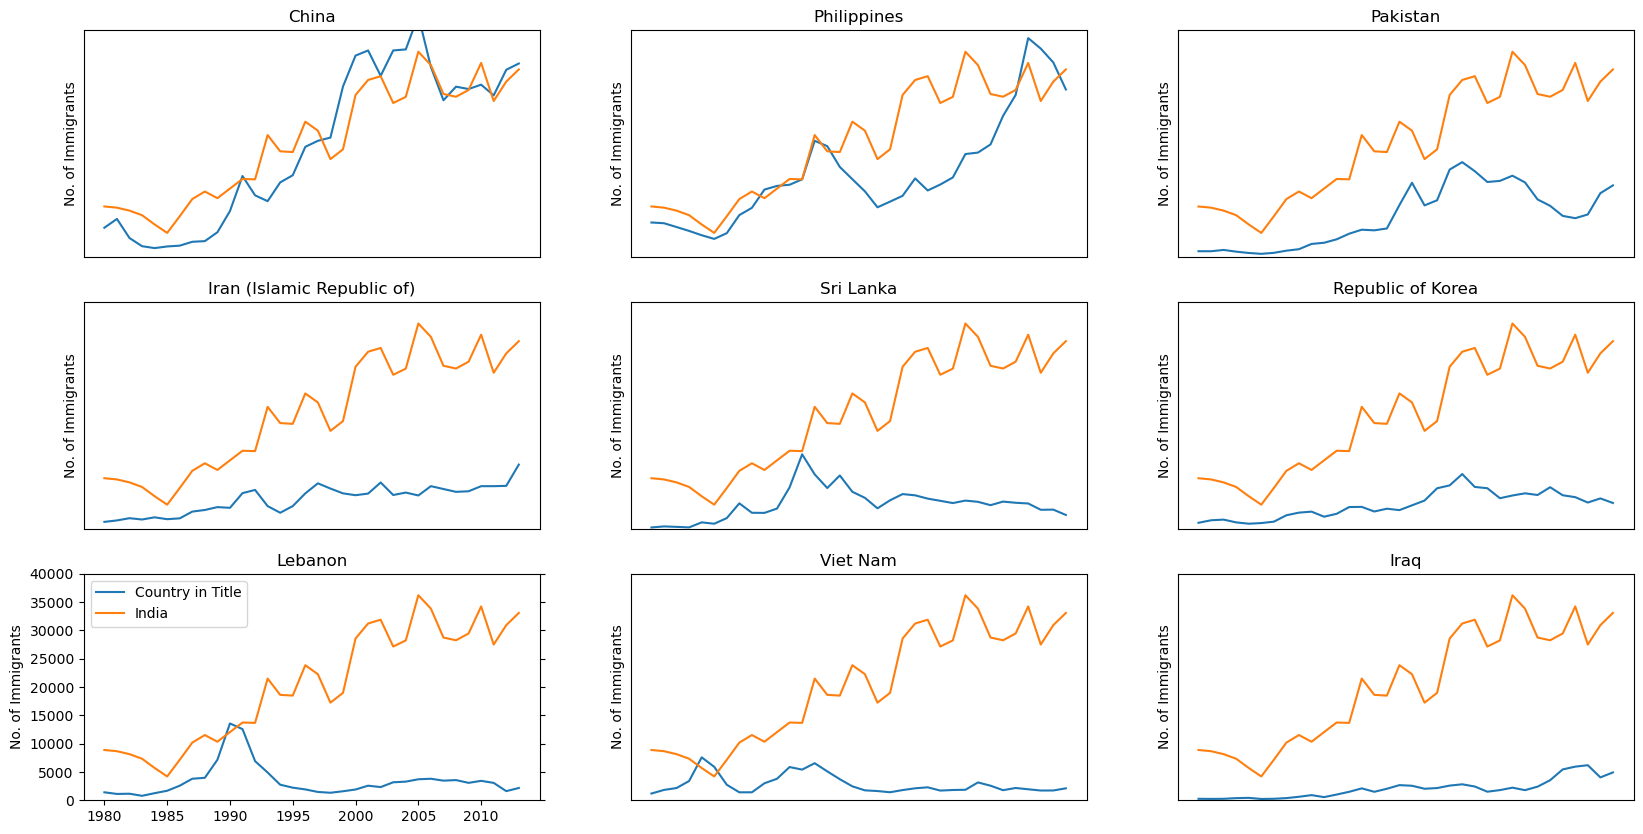

In [664]:
#your solution
temp = df_can.sort_values(by = 'Total', ascending = False)
df_list = [temp[(temp.Continent.str.contains('Asia')) & (~temp.index.str.contains('India'))].iloc[x, 3:-1] for x in range(9)]
fig, axes = plt.subplots(3, 3, figsize = (20, 10))

count=0
for r in range(3):
    for c in range(3):
        df_list[count].plot(ax=axes[r,c], ylabel = 'No. of Immigrants', ylim=(0, 40000))
        temp[(temp.index.str.contains('India'))].iloc[:, 3:-1].T.plot(ax=axes[r,c], ylabel = 'No. of Immigrants', legend = False)
        axes[r,c].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
        axes[r,c].set_title(df_list[count].name)
        count += 1
    
axes[2, 0].legend(labels = ['Country in Title', 'India'])
axes[2, 0].tick_params(left = True, right = True , labelleft = True ,labelbottom = True, bottom = True)
plt.show()

## Waffle Chart

#### g) A waffle chart is a great way to visualize data in relation to a whole or to highlight progress against a given threshold. We would like to visualize the portion of immigrates from Singapore, Malaysia and Indonesian over the years. Plot a waffle chart. Make sure to have a legend.

You may wish to refer to the pywaffle documentation and related tutorials: 
* https://readthedocs.org/projects/pywaffle/downloads/pdf/latest/
* https://www.educative.io/answers/how-to-create-a-waffle-chart-in-python

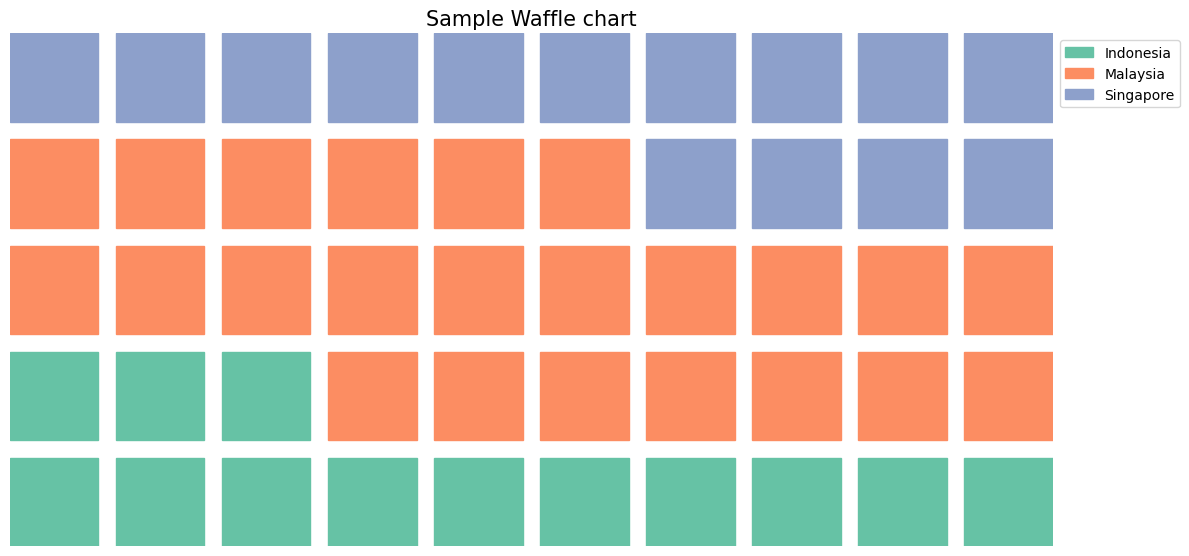

In [665]:
#your solution
import matplotlib.pyplot as plt
from pywaffle import *
threecdata = df_can[(df_can.index.str.contains('Singapore')) | (df_can.index.str.contains('Malaysia')) | (df_can.index.str.contains('Indonesia'))].iloc[:, -1]

fig = plt.figure(
    FigureClass=Waffle,
    figsize = (12, 6),
    rows=5,
    columns=10,  
    values=threecdata.to_dict(),
    title = {"label": "Sample Waffle chart", "loc": "Center", "size": 15},
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    vertical = True
)

Hence, summarize what is your understanding of a waffle chart and when can it be used.

<div class="alert alert-block alert-info">

It is similar to pie chart and can be used when trying to represent proportions of each value out of the total.
    
</div>

## Joyplot

#### h) We would like to visualize the distribution of number of immigrants in 2013 for each continent. Plot a joyplot to visualize this. 

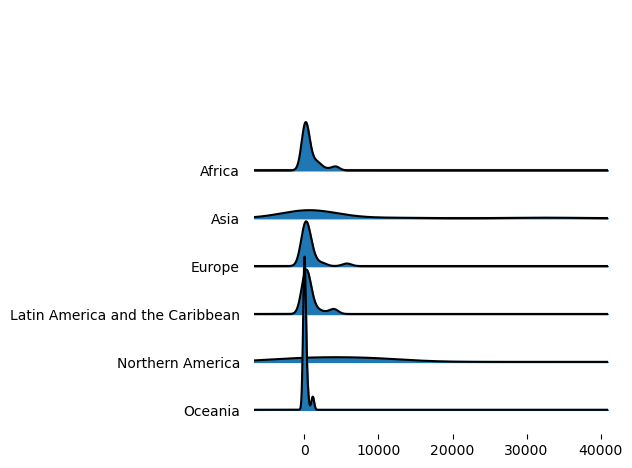

In [666]:
#your solution
import joypy
fig, axes = joypy.joyplot(df_can, by = 'Continent', column = 2013, overlap = 2) 

## Heatmap

#### i) We would like to visualize the number of immigrants to Canada from Region 'South-Eastern Asia' from 2000 to 2013. Plot a heatmap to visualize this.

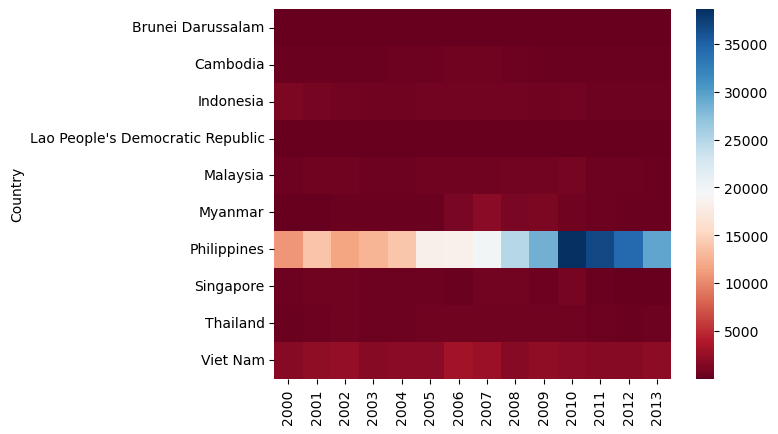

In [667]:
#your solution
import seaborn as sns
data_pivot = df_can[df_can.Region.str.contains('South-Eastern Asia')].loc[:, 2000:2013]
sns.heatmap(data_pivot, cmap='RdBu')
plt.show()

## Marker Maps with Folium

#### j) We would like create a choropleth map to visualize the immigration data in 1980 from countries in Asia only. Create a relevant visualization for this. You should zoom your map to Asia, and use the yellow-green color scheme for the map.

In [696]:
import pandas as pd
country = pd.read_csv("countries.csv", index_col=0) #read in data from wine.csv
country.head() #display the first few data from the dataframe

,latitude,longitude,name
country,,,
AD,42.546245,1.601554,Andorra
AE,23.424076,53.847818,United Arab Emirates
AF,33.939110,67.709953,Afghanistan
AG,17.060816,-61.796428,Antigua and Barbuda
AI,18.220554,-63.068615,Anguilla


In [697]:
country = country.dropna()

In [698]:
#your solution
temp = df_can[df_can.Continent.str.contains('Asia')].loc[:, 1980].to_frame().reset_index()
country = country.reset_index()
country.columns = ['code', 'latitude', 'longitude', 'Country']
foldata = country.merge(temp, how = 'inner', on = 'Country').dropna()
foldata.head()

,code,latitude,longitude,Country,1980
0,AE,23.424076,53.847818,United Arab Emirates,0
1,AF,33.939110,67.709953,Afghanistan,16
2,AM,40.069099,45.038189,Armenia,0
3,AZ,40.143105,47.576927,Azerbaijan,0
4,BD,23.684994,90.356331,Bangladesh,83


In [760]:
import folium as folium
world_map = folium.Map(location = [23.684994, 90.356331], zoom_start = 3)
folium.Choropleth(
    geo_data='world_countries.json',
    name="choropleth",
    data=foldata,
    columns=['Country', 1980],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(world_map)

folium.LayerControl().add_to(world_map)

top10 = foldata.sort_values(by = 1980, ascending = False).iloc[:10, :]
latitudes = list(top10.latitude)
longitudes = list(top10.longitude)
labels = list(top10.loc[:, 1980])
countries = list(top10.Country)

for lat, lng, label, name in zip(latitudes, longitudes, labels, countries):
    folium.Marker([lat, lng], popup=folium.Popup(folium.Html(
        '<p align="center" style="margin: 4px; fontsize: 20px; color:Blue">' + name + '</p>' + '<p align="center" style="margin: 4px; fontsize: 14px; color:Blue">' + str(label) + '</p>',
        script = True
    ))).add_to(world_map)

world_map

#### k) Add markers for the top 10 countries (i.e. countries with most immigrants in 1980). When clicked, the mark should popup the country's name and the number of immigrants.

Hint: You may use HTML tags for the label text in the popup field.

The completed visualization should look like the one below:

<img src="https://i.ibb.co/QvXRT9s/map.png" alt="map" border="0" />

## Choropleth Maps with Plotly

#### l) Use Plotly to draw a similar choropleth map to visualization the total number of immigrants to Canada from various countries.

You may wish to refer to the documentation here:
https://plotly.com/python-api-reference/generated/plotly.express.choropleth.html

and the color scheme here:
https://plotly.com/python/builtin-colorscales/

In [699]:
df_iso = pd.read_csv('ISO_Code.csv')
df_iso

,Country,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,??land Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS
...,...,...,...,...,...
241,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF
242,Western Sahara,EH,ESH,732,ISO 3166-2:EH
243,Yemen,YE,YEM,887,ISO 3166-2:YE
244,Zambia,ZM,ZMB,894,ISO 3166-2:ZM


In [792]:
#your solution
import plotly.graph_objects as go
temp2 = df_can.iloc[:, range(-1, 2)].reset_index()
plotlydata = temp2.merge(df_iso, on = 'Country', how = 'inner')
fig = go.Figure(data=go.Choropleth(
    locations = plotlydata['Alpha-3 code'],
    z = plotlydata['Total'],
    text = plotlydata['Country'],
    colorscale = 'GnBu',
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Average Life Expectancy',
))
fig.show()

You may make scatter plots on maps in Plotly. Read this up at: https://plotly.com/python/scatter-plots-on-maps/

#### m) Hence, plot a scatter plots on the world map in Plotly to help visualize the total number of immigrants to Canada from various countries.

In [791]:
import plotly.express as px
fig = px.scatter_geo(plotlydata, locations="Alpha-3 code",size = 'Total')
fig.show()

How does this scatter plot compare to maps with markers in folium?

    It allows for comparison without having to click on each individual value.